
Terror Attack Prediction

Problem statement: To understand the patterns and trends of terrorist/violent activities in certain locations over time, the methods they employ, their potential reasons, and the groups involved, in order to help law enforcement and other stakeholders prevent or mitigate future incidents.


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas.api.types import is_numeric_dtype

Loading Data

In [ ]:
df=pd.read_csv('terror_data_final.csv')
df.head().T

,0,1,2,3,4
ID,0,1,2,3,4
Date,2013-08-26,2021-05-25,1998-12-19,2001-09-02,2003-08-13
Day_of_Week,Saturday,Thursday,Thursday,Wednesday,Tuesday
Time,5:51,3:19,2:20,15:1,18:38
Location,NaN,Nairobi,Lima,rokyo,Paris
Attack_Type,Shooting,Bombing,Hijacking,Bombing,Bombing
Perpetrator,Group C,Group A,Group C,Group C,Group C
Known_Associates,1.0,6.0,2.0,9.0,0.0
Victims_Injured,NaN,5.0,49.0,NaN,27.0
Victims_Deceased,19.0,21.0,11.0,14.0,24.0


Data Cleaning

In [ ]:
txt = [x for x in df.columns[1:] if not is_numeric_dtype(df[x])]

In [ ]:
txt

['Date',
 'Day_of_Week',
 'Time',
 'Location',
 'Attack_Type',
 'Perpetrator',
 'Target_Type',
 'Weapon_Used',
 'Claimed_By',
 'Intelligence_Tip',
 'Motive',
 'Operational_Success',
 'Financial_Support',
 'Training_Location',
 'Communication_Method',
 'country']

In [ ]:
def lower(x):
    try:
        return x.lower()
    except:
        return x

In [ ]:
for x in txt:
    df[x] = df[x].apply(lower)

In [ ]:
df.head()

,ID,Date,Day_of_Week,Time,Location,Attack_Type,Perpetrator,Known_Associates,Victims_Injured,Victims_Deceased,...,Claimed_By,Intelligence_Tip,Motive,Operational_Success,Operatives_Captured,Financial_Support,Training_Location,Communication_Method,Major_Incident,country
0,0,2013-08-26,saturday,5:51,NaN,shooting,group c,1.0,NaN,19.0,...,unknown,unknown,religious,oo,4.0,local,domestic,cellphones,1,turkey
1,1,2021-05-25,thursday,3:19,nairobi,bombing,group a,6.0,5.0,21.0,...,group c,no,qeligious,to,5.0,unknowd,abroad,idternet,1,kenya
2,2,1998-12-19,thursday,2:20,lima,hijacking,group c,2.0,49.0,11.0,...,group d,no,ethnic,no,10.0,local,domestic,NaN,1,peru
3,3,2001-09-02,wednesday,15:1,rokyo,bombing,group c,9.0,NaN,14.0,...,group c,unknown,religious,NaN,NaN,local,domestic,cellphoies,1,japan
4,4,2003-08-13,tuesday,18:38,paris,bombing,group c,0.0,27.0,24.0,...,NaN,no,ethnic,NaN,9.0,unknown,domestic,cellphones,1,france


Correcting Spellings

Correcting Week

In [ ]:
from nltk.metrics import edit_distance

In [ ]:
def get_similarity(word,word_list):
    max_word = ''
    max_sim = 0
    for i in word_list:
        dst = edit_distance(i,word)
        max_length = max(len(i), len(word))
        similarity = 1 - (dst / max_length)
        if similarity > max_sim:
            max_word = i
            max_sim = similarity
    return max_word

In [ ]:
weekdays = ['saturday','sunday','monday','tuesday','wednesday','thursday','friday']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Day_of_Week']
    if isinstance(wd,float):
        continue
    if wd not in weekdays:
        correct = get_similarity(wd,weekdays)
        df.loc[i,'Day_of_Week'] = correct

Correcting Attack_Type

In [ ]:
at_type = ['bombing','shooting',
 'kidnapping',
 'hijacking',
 'arson',
 'assassination',
 'stabbing']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Attack_Type']
    if isinstance(wd,float):
        continue
    if wd not in at_type:
        correct = get_similarity(wd,at_type)
        df.loc[i,'Attack_Type'] = correct

Correcting Target_Type

In [ ]:
tr_type = ['infrastructure','government officials',
 'civilians',
 'police',
 'tourists']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Target_Type']
    if isinstance(wd,float):
        continue
    if wd not in tr_type:
        correct = get_similarity(wd,tr_type)
        df.loc[i,'Target_Type'] = correct

Correcting Weapons_Used

In [ ]:
wp_us = ['explosives',
 'chemical',
 'firearms',
 'bladed weapons',
 'incendiary',
 'melee']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Weapon_Used']
    if isinstance(wd,float):
        continue
    if wd not in wp_us:
        correct = get_similarity(wd,wp_us)
        df.loc[i,'Weapon_Used'] = correct

Correcting Cliamed_by

In [ ]:
cb = ['unknown',
 'group d',
 'group b',
 'group c',
 'group a',
 'group s',
 'group h',
 'group m',
 'group f',
 'group g',
 'group x',
 'group l',
 'group n',
 'group q',
 'group i',
 'group e',
 'group z',
 'group y',
 'group p',
 'group u',
 'group r',
 'group t',
 'group w',
 'group k',
 'group o',
 'group v',
 'group j']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Claimed_By']
    if isinstance(wd,float):
        continue
    if wd not in cb:
        correct = get_similarity(wd,cb)
        df.loc[i,'Claimed_By'] = correct

Correcting Intelligence_tip

In [ ]:
it = ['unknown',
 'yes',
 'no']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Intelligence_Tip']
    if isinstance(wd,float):
        continue
    if wd not in it:
        correct = get_similarity(wd,it)
        df.loc[i,'Intelligence_Tip'] = correct

Correcting Motive

In [ ]:
mt = ['ethnic',
 'unknown',
 'retaliation',
 'political',
 'religious']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Motive']
    if isinstance(wd,float):
        continue
    if wd not in mt:
        correct = get_similarity(wd,mt)
        df.loc[i,'Motive'] = correct


Correcting Opertational_Success

In [ ]:
os = ['yes',
 'unknown',
 'no']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Operational_Success']
    if isinstance(wd,float):
        continue
    if wd not in os:
        correct = get_similarity(wd,os)
        df.loc[i,'Operational_Success'] = correct

Correcting Financial_Support

In [ ]:
fs = ['international',
 'local',
 'unknown']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Financial_Support']
    if isinstance(wd,float):
        continue
    if wd not in fs:
        correct = get_similarity(wd,fs)
        df.loc[i,'Financial_Support'] = correct

Correcting Training_Location

In [ ]:
tl = ['abroad',
 'domestic']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Training_Location']
    if isinstance(wd,float):
        continue
    if wd not in tl:
        correct = get_similarity(wd,tl)
        df.loc[i,'Training_Location'] = correct

Correcting Communication_Method

In [ ]:
cm = ['internet',
 'couriers',
 'cellphones']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Communication_Method']
    if isinstance(wd,float):
        continue
    if wd not in cm:
        correct = get_similarity(wd,cm)
        df.loc[i,'Communication_Method'] = correct

Correcting Location

In [ ]:
locs = ['mumbai',
 'athens',
 'paris',
 'new york',
 'sydney',
 'seoul',
 'tokyo',
 'berlin',
 'mexico city',
 'bangkok',
 'moscow',
 'beijing',
 'toronto',
 'lima',
 'rio de janeiro',
 'cape town',
 'madrid',
 'istanbul',
 'dubai',
 'nairobi',
 'rome',
 'london',
 'cairo',
 'buenos aires',
 'jakarta']

In [ ]:
for i in range(len(df)):
    wd = df.loc[i,'Location']
    if isinstance(wd,float):
        continue
    if wd not in locs:
        correct = get_similarity(wd,locs)
        df.loc[i,'Location'] = correct

Final DataSet

In [ ]:
df.to_csv('./clean_terror_data_final.csv',index=False)

In [ ]:
terror=pd.read_csv('clean_terror_data_final.csv',index_col=0)
terror

,Date,Day_of_Week,Time,Location,Attack_Type,Perpetrator,Known_Associates,Victims_Injured,Victims_Deceased,Target_Type,...,Claimed_By,Intelligence_Tip,Motive,Operational_Success,Operatives_Captured,Financial_Support,Training_Location,Communication_Method,Major_Incident,country
ID,,,,,,,,,,,,,,,,,,,,,
0,2013-08-26,saturday,5:51,NaN,shooting,group c,1.0,NaN,19.0,civilians,...,unknown,unknown,religious,no,4.0,local,domestic,cellphones,1,turkey
1,2021-05-25,thursday,3:19,nairobi,bombing,group a,6.0,5.0,21.0,tourists,...,group c,no,religious,no,5.0,unknown,abroad,internet,1,kenya
2,1998-12-19,thursday,2:20,lima,hijacking,group c,2.0,49.0,11.0,NaN,...,group d,no,ethnic,no,10.0,local,domestic,NaN,1,peru
3,2001-09-02,wednesday,15:1,tokyo,bombing,group c,9.0,NaN,14.0,civilians,...,group c,unknown,religious,NaN,NaN,local,domestic,cellphones,1,japan
4,2003-08-13,tuesday,18:38,paris,bombing,group c,0.0,27.0,24.0,infrastructure,...,NaN,no,ethnic,NaN,9.0,unknown,domestic,cellphones,1,france
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1981-10-06,monday,8:18,athens,hijacking,group b,NaN,NaN,23.0,police,...,group c,no,unknown,unknown,10.0,international,abroad,cellphones,1,greece
49996,2000-11-14,tuesday,1:5,rio de janeiro,assassination,group b,3.0,5.0,4.0,tourists,...,group a,no,unknown,no,1.0,local,abroad,internet,0,brazil
49997,1993-10-24,thursday,15:13,NaN,arson,group b,7.0,0.0,8.0,civilians,...,unknown,no,religious,unknown,10.0,international,domestic,couriers,0,france


Null values

In [ ]:
terror.isna().sum()

Date                        0
Day_of_Week              3995
Time                        0
Location                 4028
Attack_Type              1365
Perpetrator                 0
Known_Associates         6241
Victims_Injured          5178
Victims_Deceased          831
Target_Type              6040
Weapon_Used              5740
Claimed_By               5988
Intelligence_Tip         2443
Motive                   2631
Operational_Success     16017
Operatives_Captured      6930
Financial_Support        4095
Training_Location        1020
Communication_Method     5997
Major_Incident              0
country                     0
dtype: int64

<Axes: >

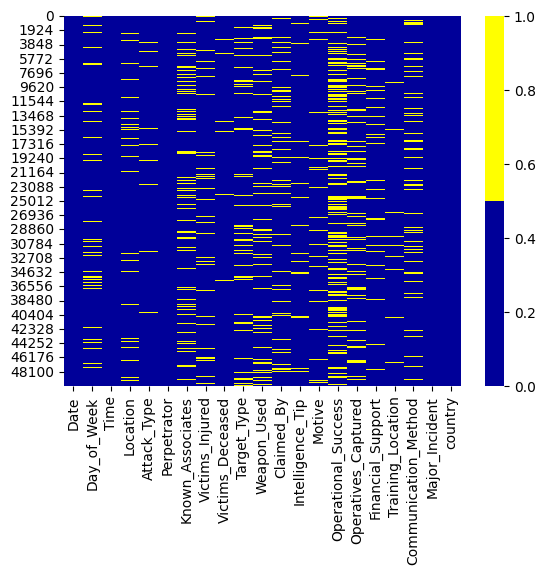

In [ ]:
import seaborn as sns
cols = terror.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

Imputation Techniques

In [ ]:
mode = terror['Day_of_Week'].mode().iloc[0]
terror['Day_of_Week'].fillna(mode, inplace=True)

In [ ]:
mode = terror['Location'].mode().iloc[0]
terror['Location'].fillna(mode, inplace=True)

In [ ]:
mode = terror['Attack_Type'].mode().iloc[0]
terror['Attack_Type'].fillna(mode, inplace=True)

In [ ]:
mode = terror['Target_Type'].mode().iloc[0]
terror['Target_Type'].fillna(mode, inplace=True)

In [ ]:
mode = terror['Weapon_Used'].mode().iloc[0]
terror['Weapon_Used'].fillna(mode, inplace=True)

In [ ]:
mode = terror['Claimed_By'].mode().iloc[0]
terror['Claimed_By'].fillna(mode, inplace=True)

In [ ]:
mode = terror['Intelligence_Tip'].mode().iloc[0]
terror['Intelligence_Tip'].fillna(mode, inplace=True)

In [ ]:
mode = terror['Motive'].mode().iloc[0]
terror['Motive'].fillna(mode, inplace=True)

In [ ]:
mode = terror['Operational_Success'].mode().iloc[0]
terror['Operational_Success'].fillna(mode, inplace=True)

In [ ]:
mode = terror['Training_Location'].mode().iloc[0]
terror['Training_Location'].fillna(mode, inplace=True)

In [ ]:
mode = terror['Communication_Method'].mode().iloc[0]
terror['Communication_Method'].fillna(mode, inplace=True)

In [ ]:
mode = terror['Financial_Support'].mode().iloc[0]
terror['Financial_Support'].fillna(mode, inplace=True)

In [ ]:
median = terror['Known_Associates'].median()
terror['Known_Associates'].fillna(median, inplace=True)

In [ ]:
median = terror['Victims_Injured'].median()
terror['Victims_Injured'].fillna(median, inplace=True)

In [ ]:
median = terror['Victims_Deceased'].median()
terror['Victims_Deceased'].fillna(median, inplace=True)

In [ ]:
median = terror['Operatives_Captured'].median()
terror['Operatives_Captured'].fillna(median, inplace=True)

In [ ]:
terror.isna().sum()

Date                    0
Day_of_Week             0
Time                    0
Location                0
Attack_Type             0
Perpetrator             0
Known_Associates        0
Victims_Injured         0
Victims_Deceased        0
Target_Type             0
Weapon_Used             0
Claimed_By              0
Intelligence_Tip        0
Motive                  0
Operational_Success     0
Operatives_Captured     0
Financial_Support       0
Training_Location       0
Communication_Method    0
Major_Incident          0
country                 0
dtype: int64

In [ ]:
terror.columns

Index(['Date', 'Day_of_Week', 'Time', 'Location', 'Attack_Type', 'Perpetrator',
       'Known_Associates', 'Victims_Injured', 'Victims_Deceased',
       'Target_Type', 'Weapon_Used', 'Claimed_By', 'Intelligence_Tip',
       'Motive', 'Operational_Success', 'Operatives_Captured',
       'Financial_Support', 'Training_Location', 'Communication_Method',
       'Major_Incident', 'country'],
      dtype='object')

In [ ]:
output_file_path = "tabelau.csv"

terror.to_csv(output_file_path, index=False)

Duplicate Records

In [ ]:
terror.duplicated().sum()

0

EDA

Text(0, 0.5, 'Major_Incident')

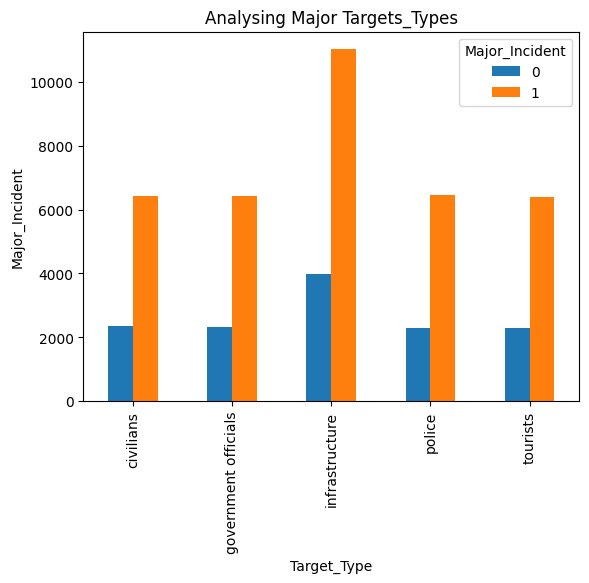

In [ ]:
pd.crosstab(terror.Target_Type,terror.Major_Incident).plot(kind='bar')
plt.title('Analysing Major Targets_Types')
plt.xlabel('Target_Type')
plt.ylabel('Major_Incident')

Text(0, 0.5, 'Major_Incident')

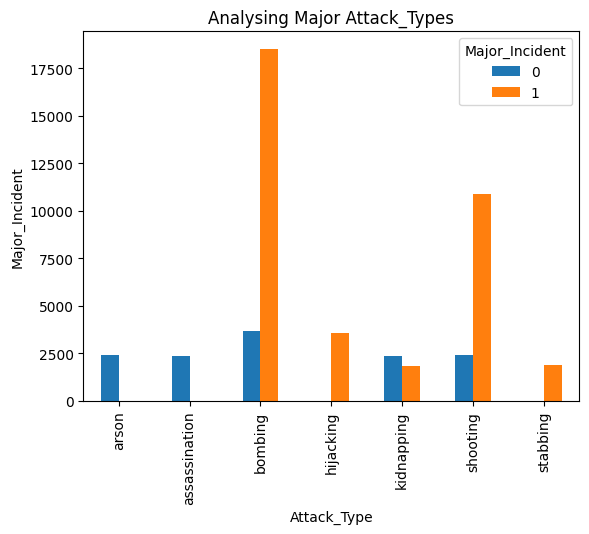

In [ ]:
pd.crosstab(terror.Attack_Type,terror.Major_Incident).plot(kind='bar')
plt.title('Analysing Major Attack_Types')
plt.xlabel('Attack_Type')
plt.ylabel('Major_Incident')

Text(0, 0.5, 'Major_Incident')

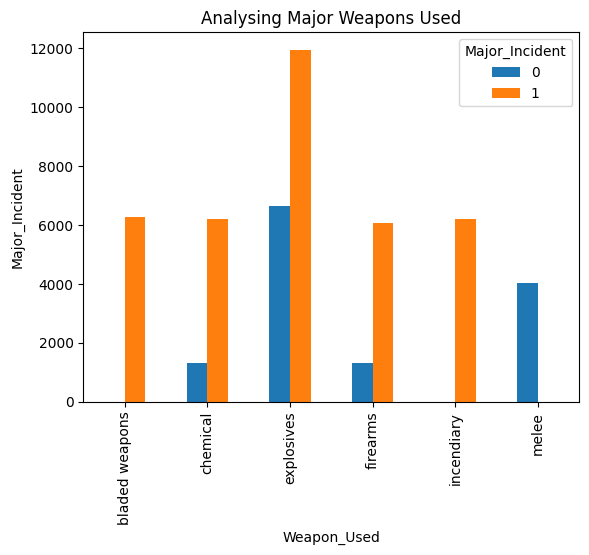

In [ ]:
pd.crosstab(terror.Weapon_Used,terror.Major_Incident).plot(kind='bar')
plt.title('Analysing Major Weapons Used')
plt.xlabel('Weapon_Used')
plt.ylabel('Major_Incident')

Text(0, 0.5, 'Major_Incident')

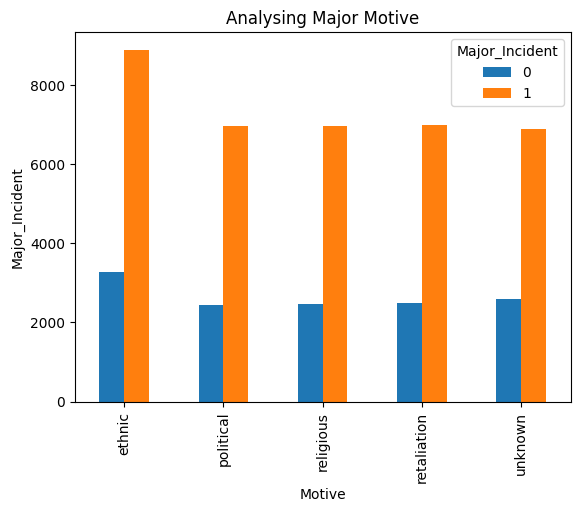

In [ ]:
pd.crosstab(terror.Motive,terror.Major_Incident).plot(kind='bar')
plt.title('Analysing Major Motive')
plt.xlabel('Motive')
plt.ylabel('Major_Incident')

Text(0, 0.5, 'Major_Incident')

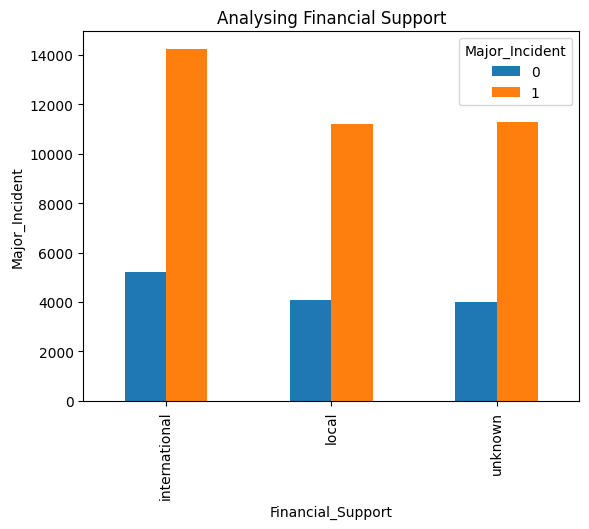

In [ ]:
pd.crosstab(terror.Financial_Support,terror.Major_Incident).plot(kind='bar')
plt.title('Analysing Financial Support')
plt.xlabel('Financial_Support')
plt.ylabel('Major_Incident')

Text(0, 0.5, 'Major_Incident')

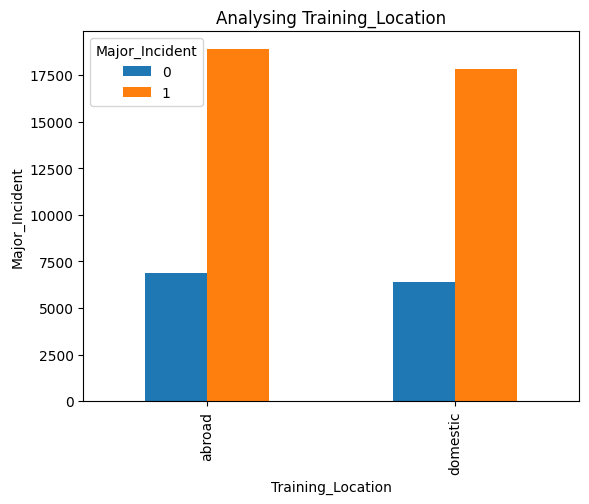

In [ ]:
pd.crosstab(terror.Training_Location,terror.Major_Incident).plot(kind='bar')
plt.title('Analysing Training_Location')
plt.xlabel('Training_Location')
plt.ylabel('Major_Incident')

Text(0, 0.5, 'Major_Incident')

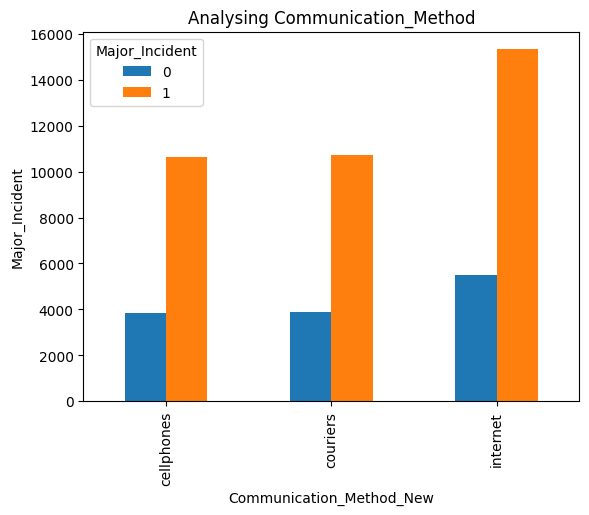

In [ ]:
pd.crosstab(terror.Communication_Method,terror.Major_Incident).plot(kind='bar')
plt.title('Analysing Communication_Method')
plt.xlabel('Communication_Method_New')
plt.ylabel('Major_Incident')

Text(0, 0.5, 'Major_Incident')

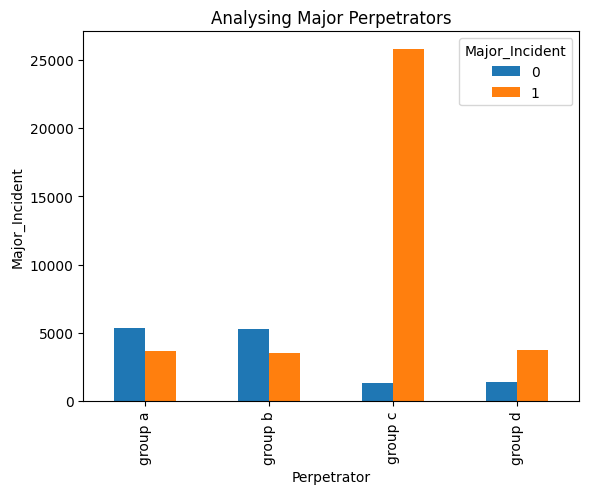

In [ ]:
pd.crosstab(terror.Perpetrator,terror.Major_Incident).plot(kind='bar')
plt.title('Analysing Major Perpetrators')
plt.xlabel('Perpetrator')
plt.ylabel('Major_Incident')

Text(0, 0.5, 'Major_Incident')

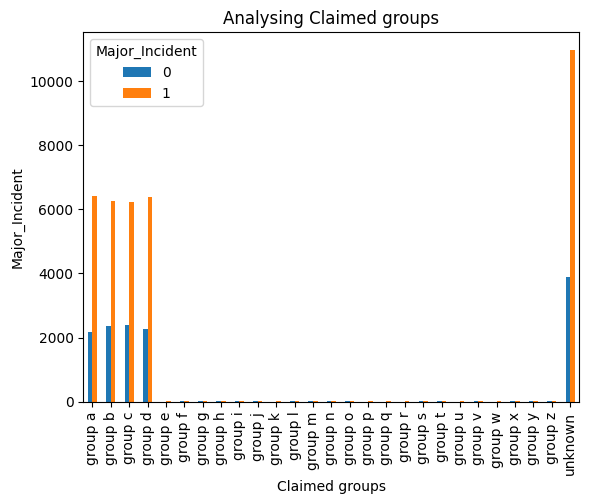

In [ ]:
pd.crosstab(terror.Claimed_By,terror.Major_Incident).plot(kind='bar')
plt.title('Analysing Claimed groups')
plt.xlabel('Claimed groups')
plt.ylabel('Major_Incident')

In [ ]:
terror.corr()

,Known_Associates,Victims_Injured,Victims_Deceased,Operatives_Captured,Major_Incident
Known_Associates,1.000000,0.004486,-0.000980,0.000503,0.002241
Victims_Injured,0.004486,1.000000,0.503914,-0.004702,0.661087
Victims_Deceased,-0.000980,0.503914,1.000000,0.000348,0.763970
Operatives_Captured,0.000503,-0.004702,0.000348,1.000000,0.002880
Major_Incident,0.002241,0.661087,0.763970,0.002880,1.000000


<Axes: >

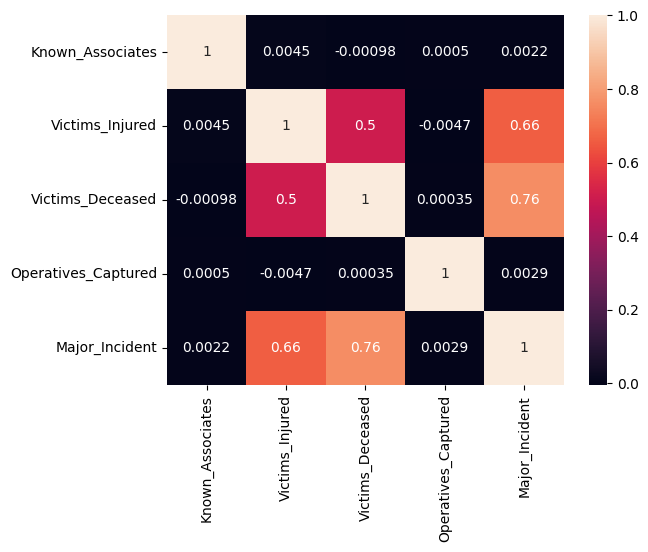

In [ ]:
sns.heatmap(terror.corr(),annot=True)

In [ ]:
!pip install sweetviz
!pip install pandas_profiling
import sweetviz as sv
sweet_report = sv.analyze(terror)
sweet_report.show_html('Attack_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Attack_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Dropping Columns

In [ ]:
terror.columns

Index(['Date', 'Day_of_Week', 'Time', 'Location', 'Attack_Type', 'Perpetrator',
       'Known_Associates', 'Victims_Injured', 'Victims_Deceased',
       'Target_Type', 'Weapon_Used', 'Claimed_By', 'Intelligence_Tip',
       'Motive', 'Operational_Success', 'Operatives_Captured',
       'Financial_Support', 'Training_Location', 'Communication_Method',
       'Major_Incident', 'country'],
      dtype='object')

In [ ]:
columns=['Date', 'Day_of_Week', 'Time', 'Location',
       'Known_Associates',
       'Target_Type', 'Claimed_By', 'Intelligence_Tip',
       'Motive', 'Operational_Success', 'Operatives_Captured',
       'Financial_Support', 'Training_Location', 'Communication_Method',
        'country']

In [ ]:
attack=terror.drop(columns,axis=1)


In [ ]:
attack

,Attack_Type,Perpetrator,Victims_Injured,Victims_Deceased,Weapon_Used,Major_Incident
ID,,,,,,
0,shooting,group c,20.0,19.0,bladed weapons,1
1,bombing,group a,5.0,21.0,chemical,1
2,hijacking,group c,49.0,11.0,explosives,1
3,bombing,group c,20.0,14.0,explosives,1
4,bombing,group c,27.0,24.0,firearms,1
...,...,...,...,...,...,...
49995,hijacking,group b,20.0,23.0,explosives,1
49996,assassination,group b,5.0,4.0,melee,0
49997,arson,group b,0.0,8.0,explosives,0


In [ ]:
attack_numerical=attack[['Victims_Injured','Victims_Deceased','Major_Incident']]
attack_numerical.head()

,Victims_Injured,Victims_Deceased,Major_Incident
ID,,,
0,20.0,19.0,1
1,5.0,21.0,1
2,49.0,11.0,1
3,20.0,14.0,1
4,27.0,24.0,1


In [ ]:
attack_categorical = attack[['Attack_Type','Perpetrator','Weapon_Used']]
attack_categorical.head()

,Attack_Type,Perpetrator,Weapon_Used
ID,,,
0,shooting,group c,bladed weapons
1,bombing,group a,chemical
2,hijacking,group c,explosives
3,bombing,group c,explosives
4,bombing,group c,firearms


Pre Processing Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot= OneHotEncoder(handle_unknown='ignore')

encoded_data = pd.DataFrame(one_hot.fit_transform(attack[['Attack_Type','Perpetrator','Weapon_Used']]).toarray())
encoded_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
49995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#save onehot encoder
import joblib
joblib.dump(one_hot, 'onehot_encoder.pkl')

# Later, you can load the encoder from the file
loaded_encoder = joblib.load('onehot_encoder.pkl')


In [ ]:
attack_final=pd.concat([attack_numerical,encoded_data],axis=1)
attack_final.tail()

,Victims_Injured,Victims_Deceased,Major_Incident,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
49995,20.0,23.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49996,5.0,4.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49997,0.0,8.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49998,17.0,10.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49999,38.0,16.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Splitting Data

In [ ]:
X = attack_final.drop('Major_Incident', axis=1)
y =attack_final.Major_Incident
X.shape

(50000, 19)

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    1
Name: Major_Incident, Length: 50000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l1, l2


# Define a function to create the model with L1 or L2 regularization
def create_regularized_model(regularization_type, regularization_strength):
    model = Sequential()
    model.add(Dense(4, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l1(2.0)))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create a model with stronger L1 regularization
l1_strong_model = create_regularized_model(tf.keras.regularizers.l1,2.0)  # Increase regularization strength

# Compile the model
l1_strong_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = l1_strong_model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = l1_strong_model.evaluate(X_test, y_test)
train_accuracy = history.history['accuracy'][-1]  # Get the final training accuracy
print("Training Accuracy (L1 Regularization):", train_accuracy)
print("Testing Accuracy (L1 Regularization):", test_accuracy)



Epoch 1/2
1250/1250 [==============================] - 4s 3ms/step - loss: 5.2897 - accuracy: 0.6319 - val_loss: 0.4396 - val_accuracy: 0.7416
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.3817 - accuracy: 0.9350
Training Accuracy (L1 Regularization): 0.8531249761581421
Testing Accuracy (L1 Regularization): 0.9350000023841858


Model Evaluation

In [ ]:
final_pred_prob=l1_strong_model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
final_pred_prob

array([[0.9348805 ],
       [0.9154871 ],
       [0.98645574],
       ...,
       [0.98085165],
       [0.4496246 ],
       [0.4246783 ]], dtype=float32)

In [ ]:
tf.round(final_pred_prob)

<tf.Tensor: shape=(10000, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
final_pred=tf.squeeze(tf.round(final_pred_prob))
final_pred

<tf.Tensor: shape=(10000,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 0., 0.], dtype=float32)>

In [ ]:
y_test

33553    1
9427     1
199      1
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     0
Name: Major_Incident, Length: 10000, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(final_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      2605
         1.0       0.96      0.96      0.96      7395

    accuracy                           0.95     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
l1_strong_model.save('l1_model_SaveModel_format')

In [ ]:
l1_strong_model.save("Downloads" ,save_format="tf")

In [ ]:
loaded_model = tf.saved_model.load('l1_model_SaveModel_format')

In [ ]:
to_pred = X_test.iloc[1,:]
type(to_pred)

pandas.core.series.Series

In [ ]:
loaded_model([to_pred])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9154872]], dtype=float32)>